In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd

In [2]:
dir = "/Users/akterminsprove/Desktop/DTU/Kandidat - Business Analytics/3. Semester/COMPSCI 285-001 Deep Reinforcement Learning/homework_fall2022/hw4/data/"

In [3]:

from tensorflow.python.summary.summary_iterator import summary_iterator

def get_from_logfile(dir, path, labels, tags):
        
    returns = np.empty((100000,len(tags)))
    returns[:] = np.nan
    idx_step = 0
    it = 0
    
    for event in summary_iterator(dir+path):

        for value in event.summary.value:

            if value.tag in tags:
                idx = tags.index(value.tag)
                #print(value.tag )
                returns[idx_step, idx] = value.simple_value

                if idx == 0 and it!=0:
                    idx_step +=1
                    #print(idx_step)
            it += 1

    return pd.DataFrame(returns, columns = labels).dropna(subset=[labels[0]])

## PROBLEM 2

In [4]:
labels= ['EnvStepSoFar','Train Average Return','Eval Average Return']

paths = "hw4_q2_obstacles_singleiteration_obstacles-cs285-v0_28-10-2022_15-39-28/events.out.tfevents.1666996768.Ann-katrine-christiansens-MacBook-Air-4.local"

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn', 'Eval_AverageReturn']

df = get_from_logfile(dir, paths, labels,tags)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [5]:
df

,EnvStepSoFar,Train Average Return,Eval Average Return
0,5050.0,-163.640549,-37.722134


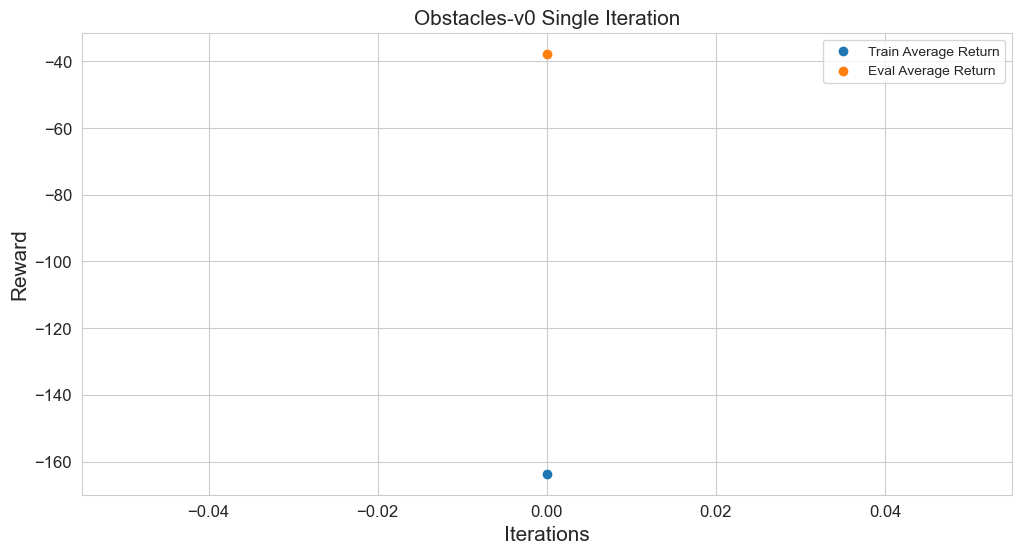

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(0,df.iloc[:,1], label = labels[1])
plt.scatter(0,df.iloc[:,2], label = labels[2])
plt.legend()
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Iterations', size=15)
plt.ylabel('Reward', size=15)
plt.title('Obstacles-v0 Single Iteration', size=15);
plt.savefig('Plots/Q2.png')

## PROBLEM 3: 

In [7]:
paths = ["hw4_q3_cheetah_cheetah-cs285-v0_28-10-2022_16-02-51/events.out.tfevents.1666998171.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q3_obstacles_obstacles-cs285-v0_28-10-2022_16-02-51/events.out.tfevents.1666998171.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q3_reacher_reacher-cs285-v0_28-10-2022_16-02-51/events.out.tfevents.1666998171.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
names= ['Cheetah','Obstacles','Reacher']

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {names[num]}',f'Train Average Return {names[num]}',f'Eval Average Return {names[num]}' ]
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

In [8]:
df_all.head(3)

,EnvStepSoFar Cheetah,Train Average Return Cheetah,Eval Average Return Cheetah,EnvStepSoFar Obstacles,Train Average Return Obstacles,Eval Average Return Obstacles,EnvStepSoFar Reacher,Train Average Return Reacher,Eval Average Return Reacher
0,5010.0,-2501.908447,133.329926,5050.0,-163.640549,-37.722134,5025.0,-1860.195923,-880.315369
1,10020.0,129.010269,227.800858,6057.0,-48.436920,-54.841473,10050.0,-541.189819,-326.359192
2,15030.0,243.134033,261.924683,7064.0,-44.456329,-36.976212,15075.0,-298.212036,-259.548523


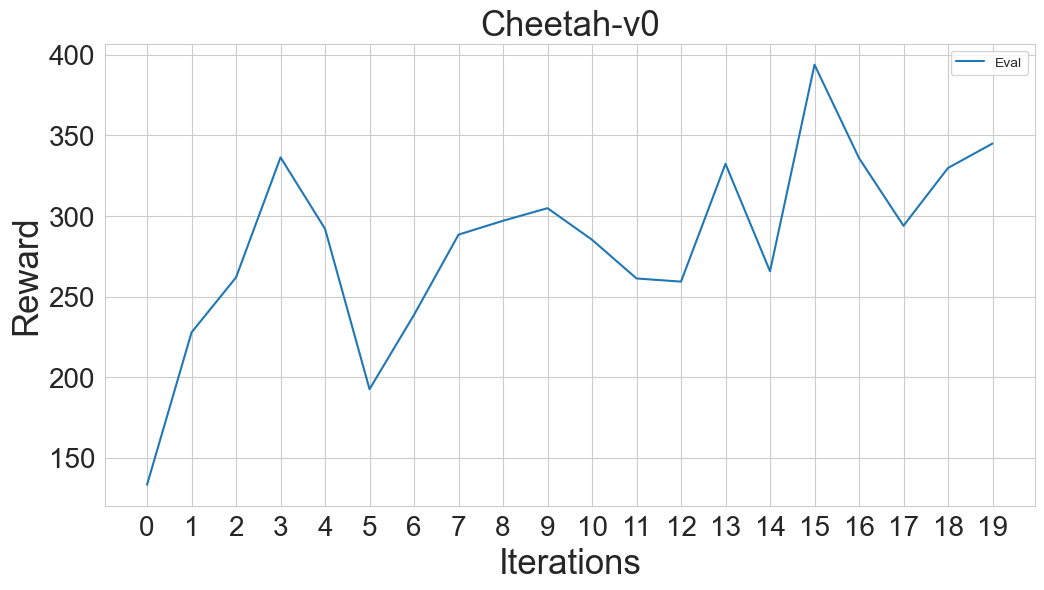

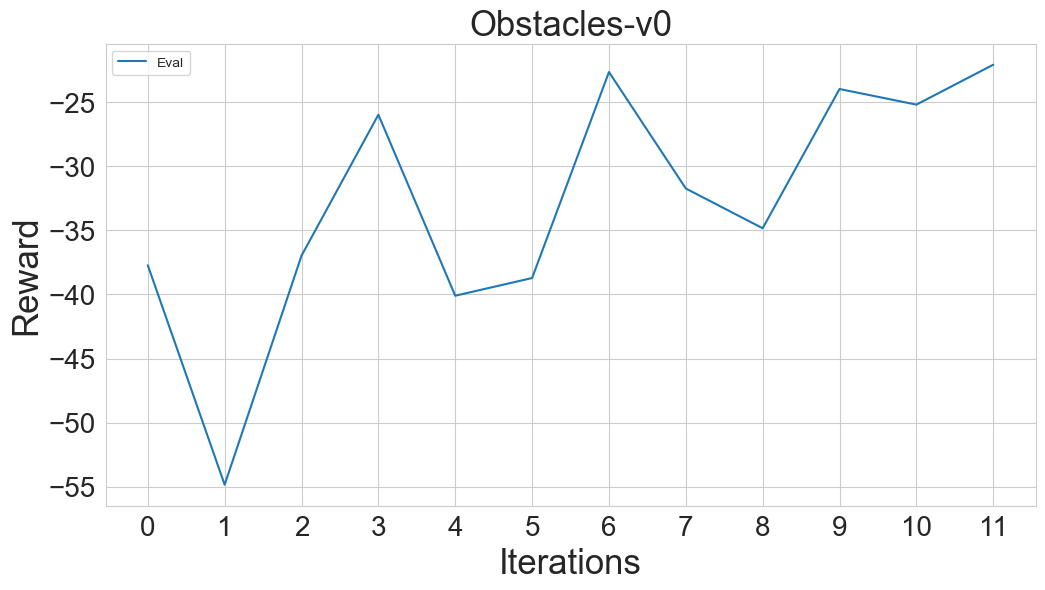

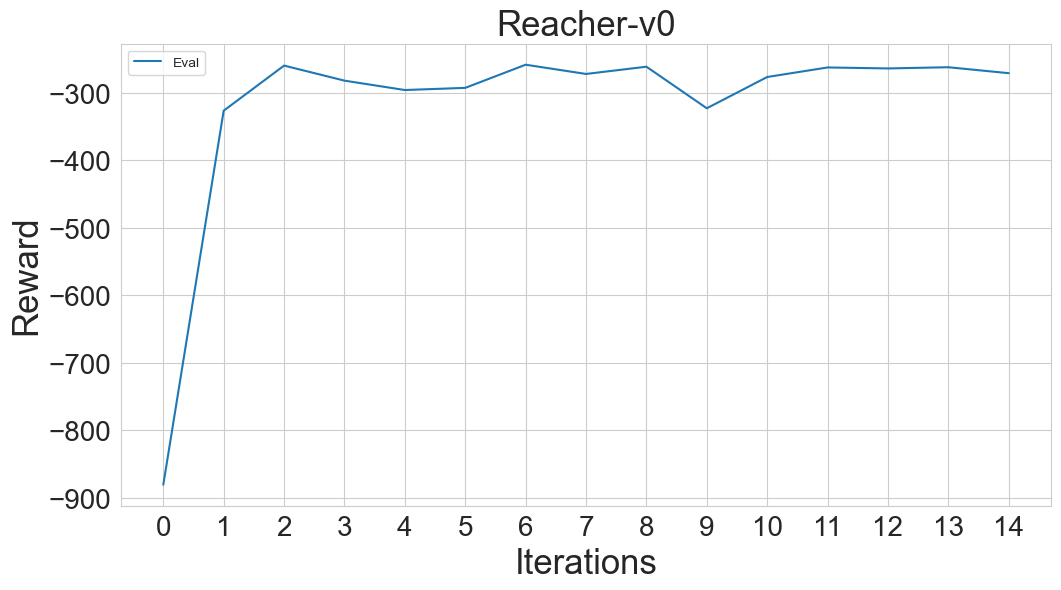

In [9]:
index = [str(i) for i in df_all.index]
#fig, ax = plt.subplots(1,3,figsize=(20,4))
for i,name in enumerate(names):
    fig, ax = plt.subplots(figsize=(12,6))
    #ax[i].plot(index,df_all[f'Train Average Return {name}'], label ="Train")
    ax.plot(index,df_all[f'Eval Average Return {name}'], label ="Eval")
    ax.legend()
    #ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #ax[i].set_yticks(np.arange(df_all[f'Train Average Return {name}'].min(),df_all[f'Train Average Return {name}'].max(),500))
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('Iterations', size=25)
    ax.set_ylabel('Reward', size=25)
    ax.set_title(f'{name}-v0', size=25);
    
    plt.savefig(f'Plots/Q3_{name}.png')

## PROBLEM 4: 

### Ensemble

In [10]:
paths = ["hw4_q4_reacher_ensemble1_reacher-cs285-v0_31-10-2022_18-33-53/events.out.tfevents.1667266433.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q4_reacher_ensemble3_reacher-cs285-v0_31-10-2022_18-33-53/events.out.tfevents.1667266433.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q4_reacher_ensemble5_reacher-cs285-v0_31-10-2022_18-33-53/events.out.tfevents.1667266433.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
hyp = ["Ensemble 1", "Ensemble 3", "Ensemble 5"]

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {hyp[num]}',f'Train Average Return {hyp[num]}',f'Eval Average Return {hyp[num]}']
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)


In [11]:
df_all.head(3)

,EnvStepSoFar Ensemble 1,Train Average Return Ensemble 1,Eval Average Return Ensemble 1,EnvStepSoFar Ensemble 3,Train Average Return Ensemble 3,Eval Average Return Ensemble 3,EnvStepSoFar Ensemble 5,Train Average Return Ensemble 5,Eval Average Return Ensemble 5
0,20100.0,-1887.054810,-453.934814,20100.0,-1887.054810,-451.286194,20100.0,-1887.054810,-389.084106
1,20904.0,-481.122375,-339.397369,20904.0,-475.505432,-310.819641,20904.0,-411.462189,-270.179047
2,21708.0,-280.640747,-285.045502,21708.0,-291.974487,-282.454651,21708.0,-271.769714,-281.526062


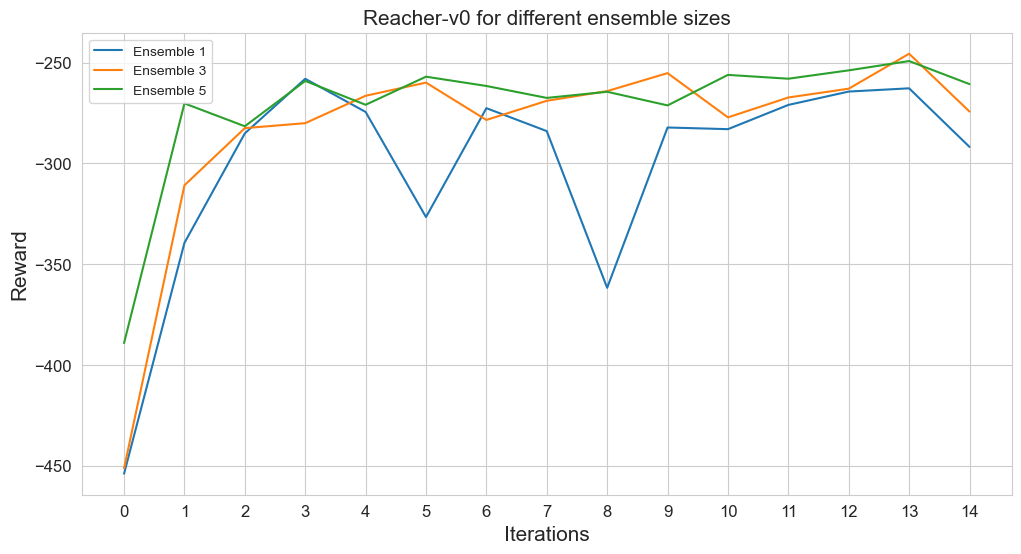

In [12]:
index = [str(i) for i in df_all.index]

fig, ax = plt.subplots(figsize=(12,6))

for h in hyp: 
    plt.plot(index, df_all[f'Eval Average Return {h}'], label = h)

plt.legend()
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Iterations', size=15)
plt.ylabel('Reward', size=15)
plt.title('Reacher-v0 for different ensemble sizes', size=15);
plt.savefig('Plots/Q4_Ensemble.png')

### Horizon

In [13]:
paths = ["hw4_q4_reacher_horizon5_reacher-cs285-v0_31-10-2022_18-33-53/events.out.tfevents.1667266433.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q4_reacher_horizon15_reacher-cs285-v0_31-10-2022_18-33-53/events.out.tfevents.1667266433.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q4_reacher_horizon30_reacher-cs285-v0_31-10-2022_18-33-53/events.out.tfevents.1667266433.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
hyp = ["Horizon 5", "Horizon 15", "Horizon 30"]

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {hyp[num]}',f'Train Average Return {hyp[num]}',f'Eval Average Return {hyp[num]}']
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)


In [14]:
df_all.head(3)

,EnvStepSoFar Horizon 5,Train Average Return Horizon 5,Eval Average Return Horizon 5,EnvStepSoFar Horizon 15,Train Average Return Horizon 15,Eval Average Return Horizon 15,EnvStepSoFar Horizon 30,Train Average Return Horizon 30,Eval Average Return Horizon 30
0,20100.0,-1887.054810,-694.929932,20100.0,-1887.054810,-415.422028,20100.0,-1887.054810,-481.567017
1,20904.0,-788.455322,-385.005341,20904.0,-398.404144,-291.704926,20904.0,-463.186310,-364.179626
2,21708.0,-328.663147,-312.005493,21708.0,-293.075470,-301.763367,21708.0,-374.835052,-332.824493


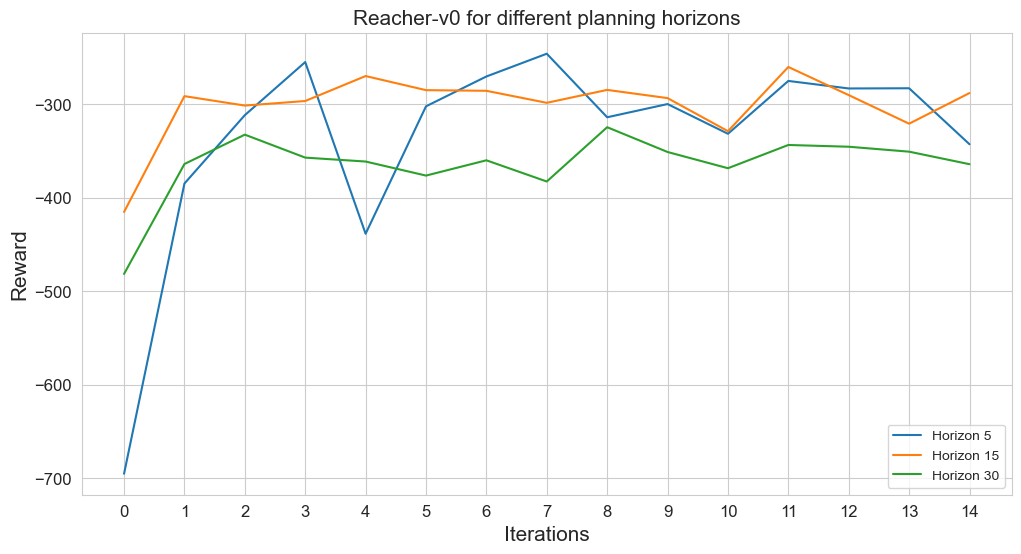

In [15]:
index = [str(i) for i in df_all.index]

fig, ax = plt.subplots(figsize=(12,6))

for h in hyp: 
    plt.plot(index, df_all[f'Eval Average Return {h}'], label = h)

plt.legend()
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Iterations', size=15)
plt.ylabel('Reward', size=15)
plt.title('Reacher-v0 for different planning horizons', size=15);
plt.savefig('Plots/Q4_Horizon.png')

### Candidate Action Sequences

In [16]:
paths = ["hw4_q4_reacher_numseq100_reacher-cs285-v0_31-10-2022_18-33-53/events.out.tfevents.1667266433.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q4_reacher_numseq1000_reacher-cs285-v0_31-10-2022_18-33-53/events.out.tfevents.1667266433.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
hyp = ["Sequence 100", "Sequence 1000"]

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {hyp[num]}',f'Train Average Return {hyp[num]}',f'Eval Average Return {hyp[num]}']
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)


In [17]:
df_all.head(3)

,EnvStepSoFar Sequence 100,Train Average Return Sequence 100,Eval Average Return Sequence 100,EnvStepSoFar Sequence 1000,Train Average Return Sequence 1000,Eval Average Return Sequence 1000
0,20100.0,-1887.054810,-644.126099,20100.0,-1887.054810,-451.286194
1,20904.0,-560.469849,-332.782043,20904.0,-475.505432,-310.819641
2,21708.0,-325.280579,-292.030090,21708.0,-291.974487,-282.454651


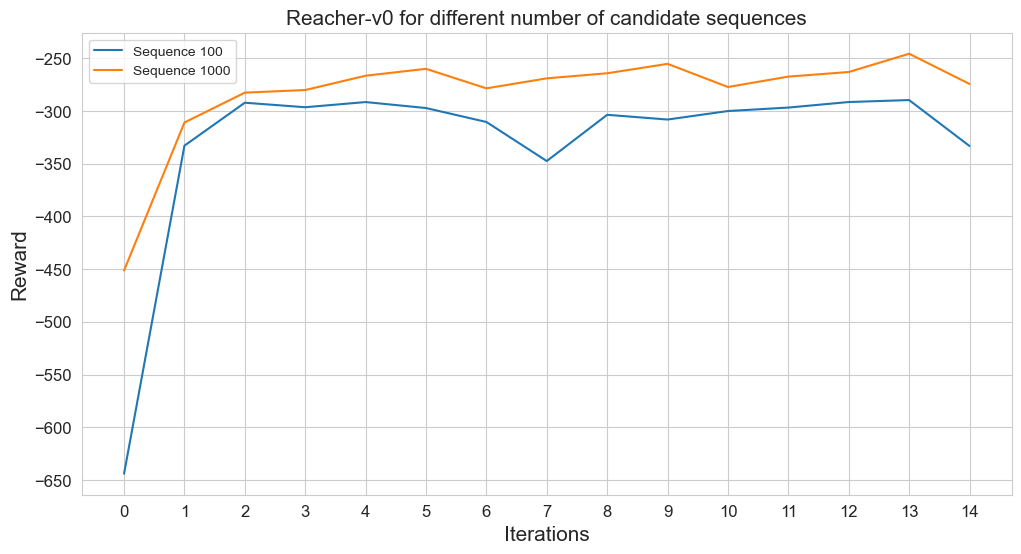

In [18]:
index = [str(i) for i in df_all.index]

fig, ax = plt.subplots(figsize=(12,6))

for h in hyp: 
    plt.plot(index, df_all[f'Eval Average Return {h}'], label = h)

plt.legend()
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Iterations', size=15)
plt.ylabel('Reward', size=15)
plt.title('Reacher-v0 for different number of candidate sequences', size=15);
plt.savefig('Plots/Q4_numseq.png')

## Problem 5: 

In [19]:
paths = ["hw4_q5_cheetah_cem_2_cheetah-cs285-v0_31-10-2022_20-44-01/events.out.tfevents.1667274241.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q5_cheetah_cem_4_cheetah-cs285-v0_31-10-2022_20-44-01/events.out.tfevents.1667274241.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q5_cheetah_random_cheetah-cs285-v0_01-11-2022_09-25-51/events.out.tfevents.1667319951.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
hyp = ["CEM 2", "CEM 4", "Random"]

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {hyp[num]}',f'Train Average Return {hyp[num]}',f'Eval Average Return {hyp[num]}']
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)


In [20]:
df_all.head(3)

,EnvStepSoFar CEM 2,Train Average Return CEM 2,Eval Average Return CEM 2,EnvStepSoFar CEM 4,Train Average Return CEM 4,Eval Average Return CEM 4,EnvStepSoFar Random,Train Average Return Random,Eval Average Return Random
0,5010.0,-2501.908447,102.136887,5010.0,-2501.908447,225.630356,5010.0,-2501.908447,133.329926
1,10020.0,121.410072,160.278290,10020.0,251.069992,403.576172,10020.0,129.010269,227.800858
2,15030.0,211.123444,368.450562,15030.0,402.288910,562.510254,15030.0,243.134033,261.924683


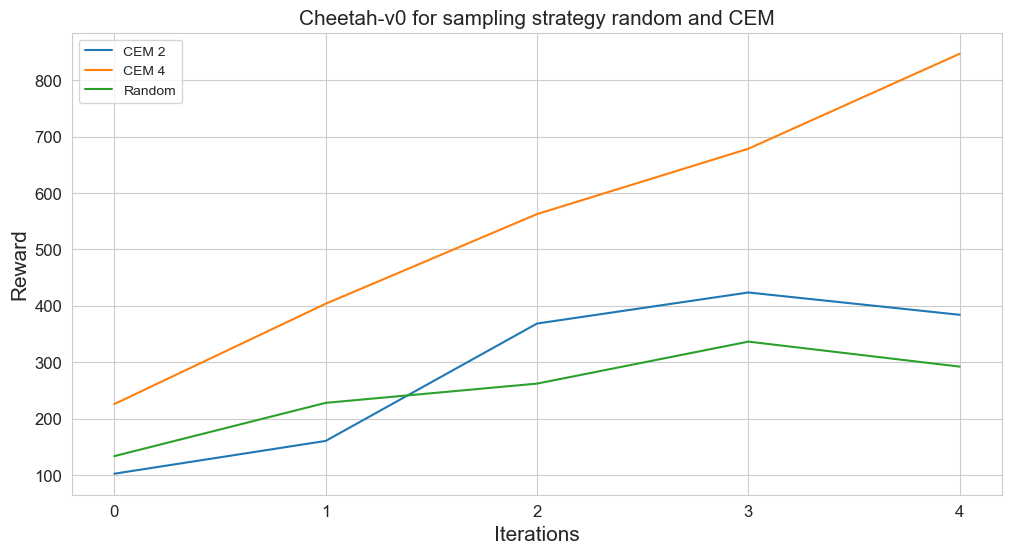

In [21]:
index = [str(i) for i in df_all.index]

fig, ax = plt.subplots(figsize=(12,6))

for h in hyp: 
    plt.plot(index, df_all[f'Eval Average Return {h}'], label = h)

plt.legend()
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Iterations', size=15)
plt.ylabel('Reward', size=15)
plt.title('Cheetah-v0 for sampling strategy random and CEM', size=15);
plt.savefig('Plots/Q5.png')

## Problem 6: 

In [22]:
paths = ["hw4_q6_cheetah_rlen1_cheetah-cs285-v0_31-10-2022_17-39-23/events.out.tfevents.1667263163.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q6_cheetah_rlen10_cheetah-cs285-v0_31-10-2022_17-39-23/events.out.tfevents.1667263163.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw4_q6_cheetah_rlenl0_cheetah-cs285-v0_31-10-2022_17-39-23/events.out.tfevents.1667263163.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
hyp = ["Dyna (roll-out length = 1)", "MBPO (roll-out length = 10)", "Model-free SAC baseline (roll-out length = 0)"]

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {hyp[num]}',f'Train Average Return {hyp[num]}',f'Eval Average Return {hyp[num]}']
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)


In [23]:
df_all.head(3)

,EnvStepSoFar Dyna (roll-out length = 1),Train Average Return Dyna (roll-out length = 1),Eval Average Return Dyna (roll-out length = 1),EnvStepSoFar MBPO (roll-out length = 10),Train Average Return MBPO (roll-out length = 10),Eval Average Return MBPO (roll-out length = 10),EnvStepSoFar Model-free SAC baseline (roll-out length = 0),Train Average Return Model-free SAC baseline (roll-out length = 0),Eval Average Return Model-free SAC baseline (roll-out length = 0)
0,5010.0,-2910.714844,121.854202,5010.0,-2910.714844,-110.551407,5010.0,-2910.714844,-109.113686
1,10020.0,149.045288,0.773382,10020.0,-44.354378,316.990845,10020.0,-99.542534,-429.934143
2,15030.0,-67.072647,95.491829,15030.0,319.570526,325.759338,15030.0,-482.389557,86.452682


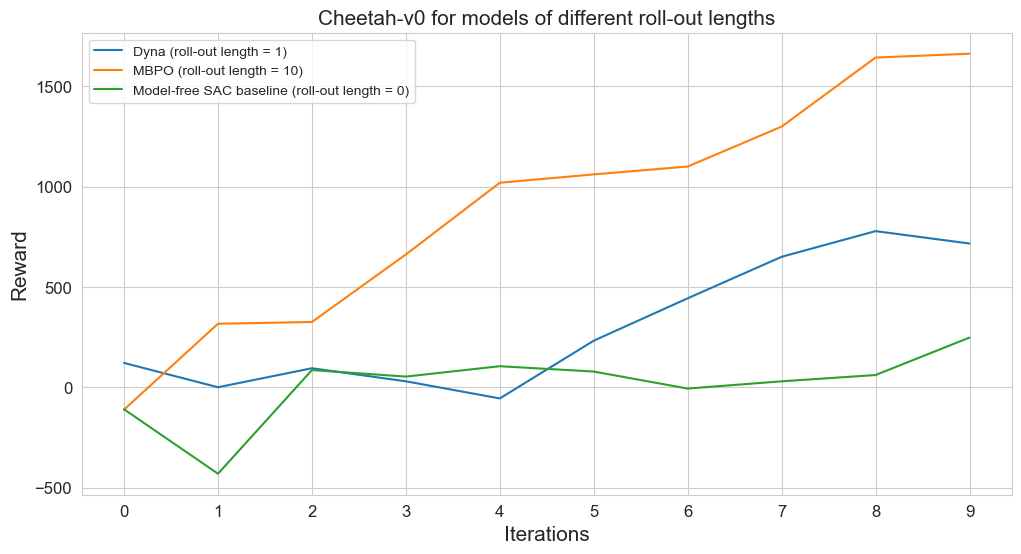

In [24]:
index = [str(i) for i in df_all.index]

fig, ax = plt.subplots(figsize=(12,6))

for h in hyp: 
    plt.plot(index, df_all[f'Eval Average Return {h}'], label = h)

plt.legend()
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Iterations', size=15)
plt.ylabel('Reward', size=15)
plt.title('Cheetah-v0 for models of different roll-out lengths', size=15);
plt.savefig('Plots/Q6.png')